In [1]:
from torchvision import transforms
import torch
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import time
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
#Local Imports
from transforms import Normalize,SequenceRandomTransform,ToTensor
from dataset import HeadposeDataset, DatasetFromSubset
from model import FSANet
from utils import draw_axis

%matplotlib inline

In [2]:
augmentation = SequenceRandomTransform()

data_path = '../data/type1/train'

hdb = HeadposeDataset(data_path,transform=None)

x (images) shape:  (122415, 64, 64, 3)
y (poses) shape:  (122415, 3)


Yaw: 21.16, Pitch: -6.89, Roll: -11.83


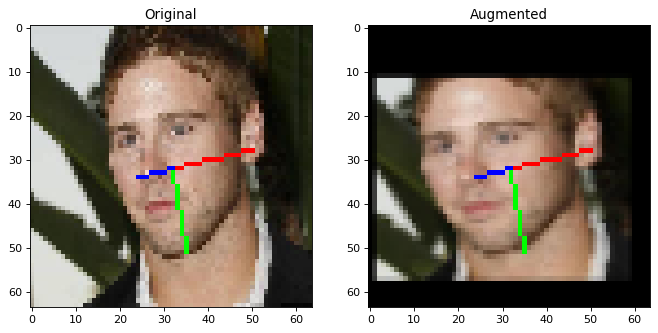

In [4]:
#Choose Input Image Index from Dataset
idx = 26
x,y = hdb[idx]
print(f'Yaw: {y[0]:.2f}, Pitch: {y[1]:.2f}, Roll: {y[2]:.2f}')
x_real = x.copy()
x_aug = augmentation(x_real).copy()

draw_axis(x_real,y[0],y[1],y[2],size=20)
draw_axis(x_aug,y[0],y[1],y[2],size=20)

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
#Draw Original Input x
plt.subplot(121)
plt.title('Original')
plt.imshow(x_real[:,:,::-1]) #show image as rgb
#Draw Augmented Input x
plt.subplot(122)
plt.title('Augmented')
plt.imshow(x_aug[:,:,::-1])